Burtin (burtin.json)

Use the Burtin  to come up with alternates to Will Burtin’s visualizations of the efficacy of three antibiotics on various bacteria. Present your results as a PowerPoint


- I have a bacterial infection (bacterium unknown): which antibiotic, and in what concentration, should I take?
- I am infected by a gram + bacteria: which antibiotic, and in what concentration, should I take?
- I am infected by a gram - bacteria: which antibiotic, and in what concentration, should I take?
- Which species of bacteria should I be most concerned about in terms of antibiotic resistance?
- Which antibiotic is most effective against each bacterium?
- Which bacteria is penicillin most effective against? Same for streptomycin, neomycin?
- What patterns are there? How can you emphasize them?

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

plt.rcParams['figure.figsize'] = (12, 8)

## Burtin
###  Use *burtin.json* to come up with alternates to Will Burtin’s visualizations of the efficacy of three antibiotics on various bacteria. 

In [37]:
data = pd.read_json('data/burtin.json')

In [85]:
data.head()

bacteria      gram  neomycin  penicillin  streptomycin
0  Mycobacterium tuberculosis  negative      2.00       800.0           5.0
1   Salmonella schottmuelleri  negative      0.09        10.0           0.8
2            Proteus vulgaris  negative      0.10         3.0           0.1
3       Klebsiella pneumoniae  negative      1.00       850.0           1.2
4            Brucella abortus  negative      0.02         1.0           2.0

In [61]:
trans = data.set_index(['bacteria', 'gram']).stack().reset_index()
cols = dict(zip(trans.columns, trans.columns))
cols['level_2'] = 'drug'
cols[0] = 'dosage'
trans.columns = cols.values()

- I have a bacterial infection (bacterium unknown): which antibiotic, and in what concentration, should I take?

In [69]:
trans_dosage = trans.set_index(['bacteria', 'drug']).unstack()['dosage']

In [77]:
trans_dosage.head()

drug                    neomycin  penicillin  streptomycin
bacteria                                                  
Aerobacter aerogenes       1.600     870.000          1.00
Brucella abortus           0.020       1.000          2.00
Brucella antracis          0.007       0.001          0.01
Diplococcus pneumoniae    10.000       0.005         11.00
Escherichia coli           0.100     100.000          0.40

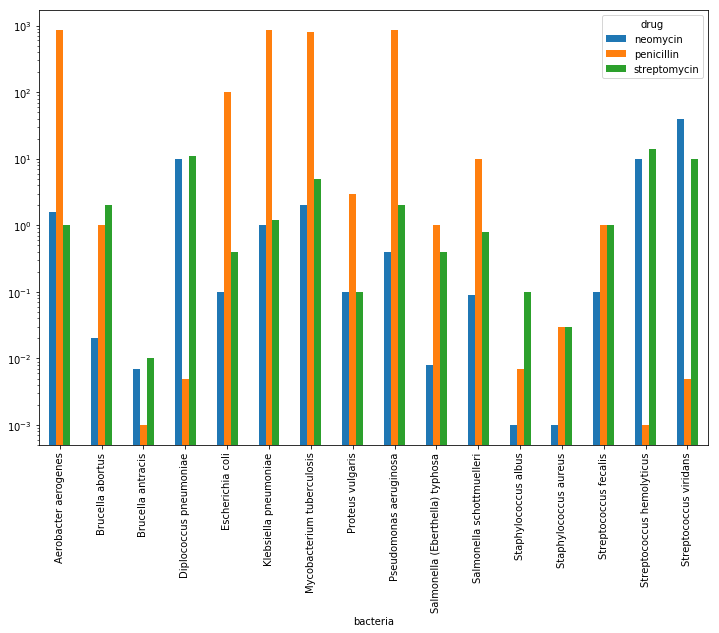

In [70]:
_ = trans_dosage.plot.bar(log=True)

- I am infected by a gram + bacteria: which antibiotic, and in what concentration, should I take?

In [109]:
def log_barplot(x, y, **kwargs):
    kwargs['log'] = True
    _ = sns.barplot(x,y,**kwargs)

In [161]:
log_trans = trans.assign(dosage=trans.dosage.apply(math.log))
log_trans = log_trans[(log_trans.dosage.isna() == False) & (abs(log_trans.dosage) > 0.00001)]

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


[[],
 [],
 [],
 [],
 [None, None, None, None, None, None],
 [None, None, None, None, None, None]]

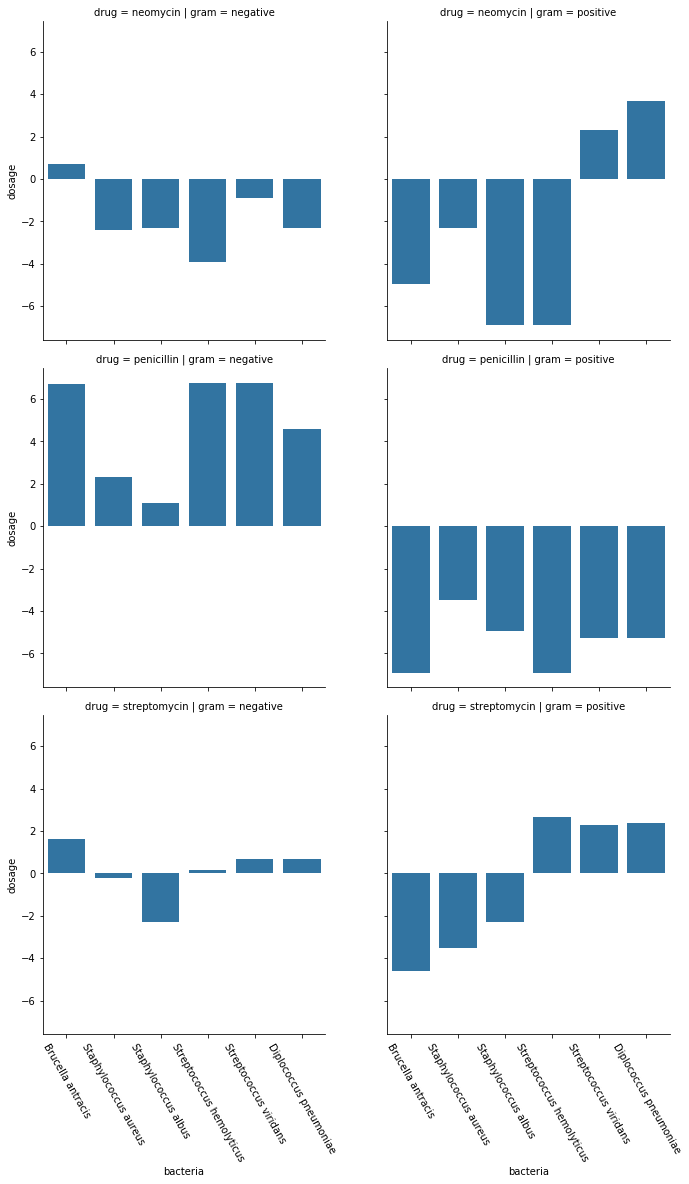

In [195]:
g = sns.FacetGrid(data=log_trans, col='gram', row='drug', height=5, aspect=1)
_ = g.map(sns.barplot, 'bacteria', 'dosage')

[[label.set_rotation(-60) for label in ax.get_xticklabels()] for ax in list(g.axes.flat)]

Present your results as a PowerPoint